## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
# set the seed for np
np.random.seed(42)

## Define the objective function

In [2]:
def objective_function(x):
    return x**2 

## Set PSO hyperparameters

In [3]:
num_particles = 10
num_iterations = 30

w = 0.5
c1 = 1.5
c2 = 1.5

lower_bound = -10
upper_bound = 10

## Initialize positions and velocities

In [4]:
positions = np.random.uniform(lower_bound,upper_bound,num_particles)
velocities = np.zeros((num_particles))

## Initialize personal bests

In [5]:
pbest = positions.copy()
pbest_fitness = objective_function(pbest)

## Initialize global best

In [6]:
gbest_index = np.argmin(pbest_fitness)
gbest = pbest[gbest_index]
gbest_fitness = pbest_fitness[gbest_index]

## Store positions for animation

In [7]:
positions_history = [positions.copy()]
gbest_history = [gbest]

## Main PSO loop

In [8]:
history = []

for iter in range(num_iterations):
    for i in range(num_particles):
        r1 = np.random.rand()
        r2 = np.random.rand()

        #TODO: Update velocity
        velocities[i] = (w * velocities[i] +
                         c1 * r1 * (pbest[i] - positions[i]) +
                         c2 * r2 * (gbest - positions[i]))

        #TODO: Update position
        positions[i] = positions[i] + velocities[i]

        #Clip position to bounds
        positions[i] = np.clip(positions[i], lower_bound,upper_bound)
        #Evaluate fitness
        fitness = objective_function(positions[i])


        # TODO: Update personal best (p_best and p_best_scores) if new position is better
        if fitness < pbest_fitness[i]:
            pbest[i] = positions[i]
            pbest_fitness[i] = fitness
        # TODO: Update global best (g_best and g_best_score) if new p_best is better than g_best
            if fitness < gbest_fitness:
                gbest = pbest[i]
                gbest_fitness = fitness
    history.append(gbest_fitness)
    positions_history.append(positions.copy()) # for animation
    gbest_history.append(gbest) # for animation

In [9]:
# Final results
print(f"\nBest solution found: {gbest}")
print(f"Minimum value: f(x)= {gbest_fitness}")


Best solution found: -7.491227138472134e-06
Minimum value: f(x)= 5.6118484040181397e-11


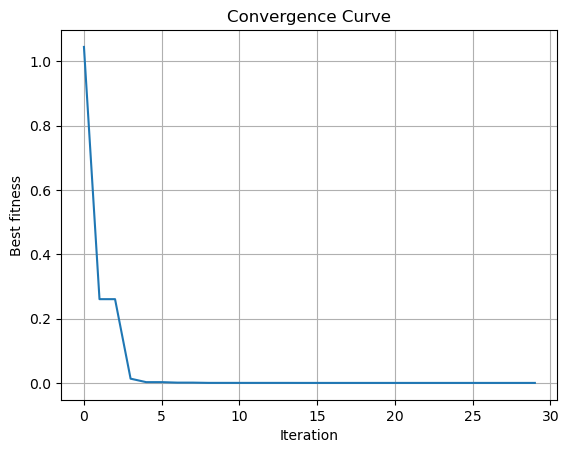

In [10]:
# Convergence plot
plt.plot(history)
plt.title("Convergence Curve")
plt.xlabel("Iteration")
plt.ylabel("Best fitness")
plt.grid(True)
plt.show()

## Animation

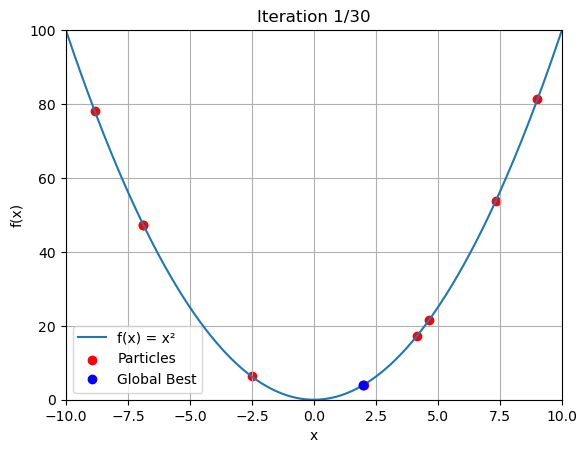

Animation saved as pso_animation.mp4


In [11]:
x_vals = np.linspace(lower_bound, upper_bound, 400)
y_vals = objective_function(x_vals)

fig, ax = plt.subplots()
ax.plot(x_vals, y_vals, label='f(x) = x²')
sc = ax.scatter([], [], c='red', label='Particles')
gbest_point, = ax.plot([], [], 'bo', label='Global Best')

ax.set_xlim(lower_bound, upper_bound)
ax.set_ylim(0, upper_bound**2)
ax.set_title("PSO Optimization Animation")
ax.set_xlabel("x")
ax.set_ylabel("f(x)")
ax.grid(True)
ax.legend()


def update(frame):
    current_positions = positions_history[frame]
    sc.set_offsets(
        np.c_[current_positions, objective_function(current_positions)])
    gbest_point.set_data([gbest_history[frame]], [
                         objective_function(gbest_history[frame])])
    ax.set_title(f"Iteration {frame+1}/{num_iterations}")
    return sc, gbest_point


ani = FuncAnimation(fig, update, frames=len(
    positions_history), interval=300, blit=True)

plt.show()
animation_file = 'pso_animation.mp4'
ani.save(animation_file, writer='ffmpeg', fps=2)
print(f"Animation saved as {animation_file}")